In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [21]:
ppo1 = "logs/ppo1/ppo_random_opponent_training_log_lr3e-4.json"
ppo2 = "logs/ppo2/ppo_shanten_opponent_training_log.json"
ppo3 = "logs/ppo3/training_log_lr3e-4.json"
ppo4_1 = "logs/ppo4/stage_1_logs.json"
ppo4_2 = "logs/ppo4/stage_2_logs.json"
ppo4_3 = "logs/ppo4/stage_3_logs.json"
ppo4_4 = "logs/ppo4/stage_4_logs.json"
ppo5 = "logs/ppo5/training_log_ppo5_10000.json"

In [22]:
def jsontodf(path):
    ppo1_records = []
    with open(path, 'r') as f:
        for line in f:
            ppo1_records.append(json.loads(line))

    # Convert to DataFrame
    df = pd.DataFrame(ppo1_records)
    return df

In [23]:
df1 = jsontodf(ppo1)
df2 = jsontodf(ppo2)
df3 = jsontodf(ppo3)
df5 = jsontodf(ppo5)

In [24]:
ppo4_records = []
with open(ppo4_1, 'r') as f:
    for line in f:
        ppo4_records.append(json.loads(line))
with open(ppo4_2, 'r') as f:
    for line in f:
        ppo4_records.append(json.loads(line))
with open(ppo4_3, 'r') as f:
    for line in f:
        ppo4_records.append(json.loads(line))
with open(ppo4_4, 'r') as f:
    for line in f:
        ppo4_records.append(json.loads(line))

# Convert to DataFrame
df4 = pd.DataFrame(ppo4_records)

In [25]:
df1.shape, df2.shape, df3.shape, df4.shape, df5.shape

((30, 6), (30, 6), (30, 6), (30, 6), (30, 6))

In [29]:
df4

,episode,avg_reward,actor_loss,value_loss,entropy,total_loss
0,100,282.61,-2.667620e-08,21330.500000,1.746901,10665.248047
1,200,338.91,-4.464007e-07,9550.990234,1.045376,4775.494141
2,300,377.29,-0.000000e+00,3279.943848,0.826492,1639.971069
3,400,376.37,-2.127155e-08,1413.380737,0.519535,706.689819
4,100,381.67,-4.161488e-08,9174.943359,0.228492,4587.471680
5,200,434.18,1.692913e-08,1970.026245,0.238107,985.012878
6,300,422.70,-0.000000e+00,4266.610840,0.213084,2133.305176
7,400,515.05,9.710138e-08,7408.820801,0.142986,3704.410156
8,500,534.83,2.318965e-08,7568.338867,0.149247,3784.169189
9,600,506.34,-2.298010e-08,17815.613281,0.191040,8907.806641


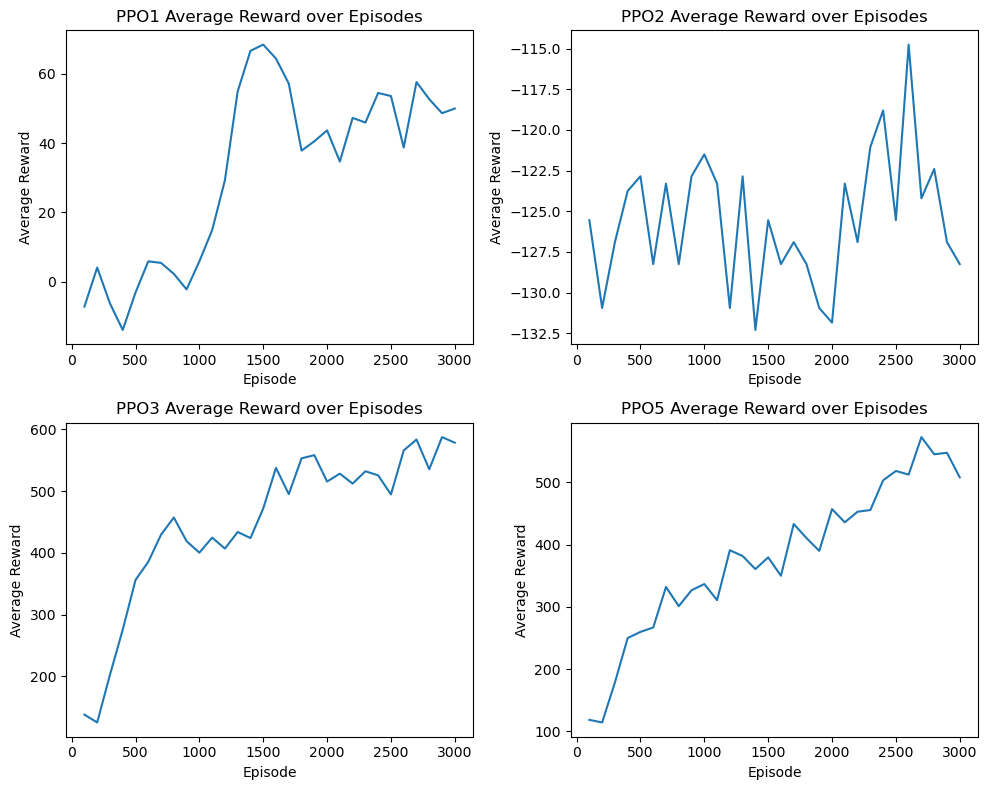

In [32]:
dfs = [df1, df2, df3, df5]
titles = ['PPO1', 'PPO2', 'PPO3', 'PPO5']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.flatten()

ax[0].plot(df1['episode'], df1['avg_reward'])
ax[0].set_title('PPO1 Average Reward over Episodes')
ax[0].set_xlabel('Episode')
ax[0].set_ylabel('Average Reward')

ax[1].plot(df2['episode'], df2['avg_reward'])
ax[1].set_title('PPO2 Average Reward over Episodes')
ax[1].set_xlabel('Episode')
ax[1].set_ylabel('Average Reward')

ax[2].plot(df3['episode'], df3['avg_reward'])
ax[2].set_title('PPO3 Average Reward over Episodes')
ax[2].set_xlabel('Episode')
ax[2].set_ylabel('Average Reward')

ax[3].plot(df5['episode'], df5['avg_reward'])
ax[3].set_title('PPO5 Average Reward over Episodes')
ax[3].set_xlabel('Episode')
ax[3].set_ylabel('Average Reward')

plt.tight_layout()
plt.show()

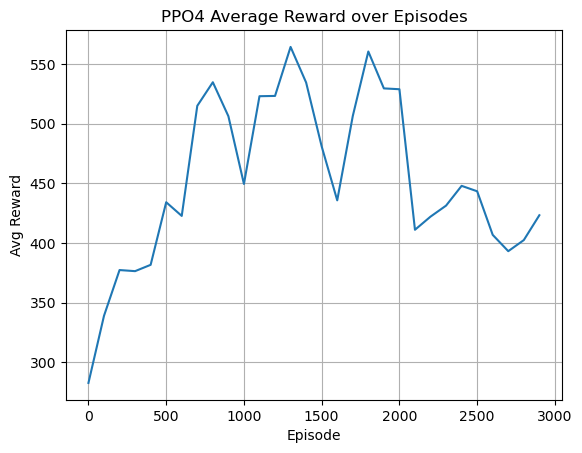

In [31]:
plt.plot(df4.index * 100, df4['avg_reward'])
plt.title('PPO4 Average Reward over Episodes')
plt.xlabel('Episode')
plt.ylabel('Avg Reward')
plt.grid(True)
plt.show()